In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("survey.csv")

In [2]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.dtypes.head()

Timestamp    object
Age           int64
Gender       object
Country      object
state        object
dtype: object

In [4]:
print(df[["state", "treatment"]].head())

  state treatment
0    IL       Yes
1    IN        No
2   NaN        No
3   NaN       Yes
4    TX        No


In [5]:
df.treatment.unique()


array(['Yes', 'No'], dtype=object)

In [6]:
df.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [7]:
America=df[df["Country"]=="United States"]

In [8]:
new_df=America.groupby(['Country','state', 'treatment']).size()
print(new_df.head())

Country        state  treatment
United States  AL     No            1
                      Yes           7
               AZ     No            1
                      Yes           6
               CA     No           52
dtype: int64


In [9]:
treat_yes=df[df["treatment"]=="Yes"]
treat_yes=treat_yes.groupby(['state'])["treatment"].size().reset_index()
treat_yes=pd.DataFrame(treat_yes)
print(treat_yes.head())


  state  treatment
0    AL          7
1    AZ          6
2    CA         86
3    CO          4
4    CT          2


In [10]:
treat_no=df[df["treatment"]=="No"]
treat_no=treat_no.groupby(['state'])["treatment"].size().reset_index()
treat_no=pd.DataFrame(treat_no)
print(treat_no.head())

  state  treatment
0    AL          1
1    AZ          1
2    CA         52
3    CO          5
4    CT          2


In [11]:
df_final=treat_yes.merge(treat_no, left_on='state', right_on='state')
df_final.columns=["State", "YES", "NO"]
df_final.head()

,State,YES,NO
0,AL,7,1
1,AZ,6,1
2,CA,86,52
3,CO,4,5
4,CT,2,2


   State  YES  NO
2     CA   86  52
33    WA   41  29
22    NY   30  27
30    TX   25  19
23    OH   20  10
9     IL   20   9
29    TN   18  27
25    OR   17  12
26    PA   14  15
10    IN   13  14


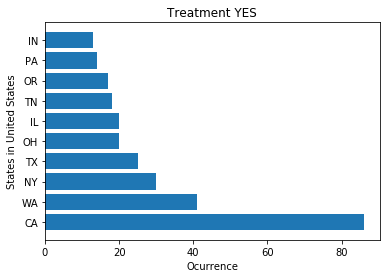

In [12]:
df_final_yes=df_final.sort_values(by="YES", ascending=False)
df_final_yes=df_final_yes.iloc[:10, :]
print(df_final_yes)

plt.barh(df_final_yes.State, width= df_final_yes.YES)
plt.title ("Treatment YES")
plt.xlabel("Ocurrence")
plt.ylabel("States in United States")
plt.show()

   State  YES  NO
2     CA   86  52
33    WA   41  29
29    TN   18  27
22    NY   30  27
30    TX   25  19
26    PA   14  15
10    IN   13  14
25    OR   17  12
14    MI   10  12
12    MA   10  10


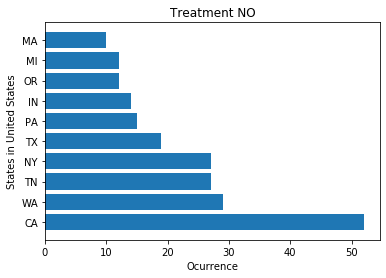

In [13]:
df_final_no=df_final.sort_values(by="NO", ascending=False)
df_final_no=df_final_no.iloc[:10, :]
print(df_final_no)

plt.barh(df_final_no.State, width= df_final_no.NO)
plt.title ("Treatment NO")
plt.xlabel("Ocurrence")
plt.ylabel("States in United States")
plt.show()

In [14]:
Total=df_final.sum()
print(Total)

State    ALAZCACOCTDCFLGAIAILINKYMAMDMIMNMONCNENHNJNVNY...
YES                                                    403
NO                                                     327
dtype: object
